# Native darknet+NNPACK

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from enum import Enum
import numpy as np, scipy.stats as st

In [51]:
darknet = './darknet'
baseDir = './bench/'

#darknet19 = 'bench_darknet19_native'
yolo = 'bench_yolo_native'
vgg = 'bench_vgg_native'

In [78]:
class Program(Enum):
    BASELINE = 0
    WT = 1
    FT8 = 2
    FT16 = 3
    GEMM = 4
    AUTO = 5
    DIRECT = 6
    DIRECT_FT8 = 7

In [79]:
def make(program):
    
    values = ""
    
    match program:
        case Program.BASELINE: values = 'NNPACK=0'        
        case Program.WT:   values = 'NNPACK=1 WT=1'
        case Program.FT8:   values = 'NNPACK=1 FT8=1'
        case Program.FT16:   values = 'NNPACK=1 FT16=1'
        case Program.GEMM:   values = 'NNPACK=1 GEMM=1'
        case Program.AUTO:   values = 'NNPACK=1 AUTO=1'
        case Program.DIRECT:   values = 'NNPACK=1 DIRECT=1'
        case Program.DIRECT_FT8: values =  'NNPACK=1 DIRECT=1 FT8=1' 
            
    os.system('make clean; make'+ ' ' +values ) 

In [49]:
def bench(benchmark, n, tag):

    out =  baseDir + benchmark +'-'+tag + '.txt'
    
    cmd = ' '.join([darknet, benchmark, n, out])
   
    print(cmd + '\n\n')
    
    os.system(cmd)
    
    return(out)

In [6]:
def readData(file):
    
    data = []
  
    with open(file, 'r') as fp:
        lines = fp.readlines()
        for row in lines:
            data.append(float(row))                
        
    return data

In [39]:
def plot_hist(data):
    
    print("mean: ", np.mean(data))
    
    result = plt.hist(data, bins=len(data), color='c', edgecolor='k', alpha=0.65)
    
    plt.axvline(np.mean(data), color='r', linestyle='dashed', linewidth=1)
    
    ci = st.t.interval(0.95, len(data)-1, loc=np.mean(data), scale=st.sem(data))
    
    plt.axvline(ci[0], color='r', linestyle='dotted', linewidth=1)
    plt.axvline(ci[1], color='r', linestyle='dotted', linewidth=1)
    

In [41]:
def plot_comp(x,x_label,y,y_label):
    
    plt.hist(x, bins=len(x), alpha=0.5, label=x_label,color='r')
    plt.hist(y, bins=len(y), alpha=0.5, label=y_label,color='b')
    plt.legend(loc='upper right')
    
    plt.axvline(np.mean(x), color='r', linestyle='dashed', linewidth=1)
    plt.axvline(np.mean(y), color='b', linestyle='dashed', linewidth=1)
    
    ci = st.t.interval(0.95, len(x)-1, loc=np.mean(x), scale=st.sem(x))
    
    plt.axvline(ci[0], color='r', linestyle='dotted', linewidth=1)
    plt.axvline(ci[1], color='r', linestyle='dotted', linewidth=1)
    
    
    ci = st.t.interval(0.95, len(y)-1, loc=np.mean(y), scale=st.sem(y))
    
    plt.axvline(ci[0], color='b', linestyle='dotted', linewidth=1)
    plt.axvline(ci[1], color='b', linestyle='dotted', linewidth=1)
    
    print(x_label," mean:", np.mean(x))
    print(y_label," mean:", np.mean(y))
    print("speedup:", max(np.mean(x)/np.mean(y),np.mean(y)/np.mean(x)))
    plt.show()
    

In [52]:
def runBench(program, benchmark, tag,n):
    make(program)
    out = bench(benchmark,n,tag) 
    data = readData(out)
    plot_hist(data)
    
    return data

In [55]:
n = str(50)
benchmark = yolo

# Baseline

In [10]:
#make(Program.BASELINE)

In [11]:
#baseline_out = bench(benchmark,n,"baseline") 

In [12]:
#baseline_data = readData(baseline_out)

In [13]:
#plot_hist(baseline_data)

# Winograd

In [66]:
make(Program.WT)

rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o libdarknet.so libdarknet.a darknet ./obj/captcha.o ./obj/lsd.o ./obj/super.o ./obj/art.o ./obj/tag.o ./obj/cifar.o ./ob

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DWT -c ./src/l2norm_layer.c -o obj/l2norm_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DWT -c ./src/yolo_layer.c -o obj/yolo_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DWT -c ./src/iseg_layer.c -o obj/iseg_layer.o
g++ -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DWT -c ./src/image_opencv.cpp -o obj/image_opencv.o
ar rcs libdarknet.a obj/gemm.o obj/utils.o obj/cuda.o obj/deconvolutional_layer.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/net

/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libnnpack.a when searching for -l:libnnpack.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libpthreadpool.a when searching for -l:libpthreadpool.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libcpuinfo.a when searching for -l:libcpuinfo.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libclog.a when searching for -l:libclog.a


In [67]:
wt_out = bench(benchmark,n,"wt") 

./darknet bench_yolo_native 50 ./bench/bench_yolo_native-wt.txt




layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

NNPACK initialize status: 0
bench_native yolo
 ./bench/bench_yolo_native-wt.txt
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.906664 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.900791 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.719138 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.656901 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.652281 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.658022 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.653318 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.655860 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.656277 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.658825 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.660021 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.657136 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.665373 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.669196 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.665424 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.666107 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.672466 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.671481 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.670921 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.673769 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.671879 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.675122 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.671557 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.672703 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.677175 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.672959 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.675309 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.676319 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.681924 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.686385 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.683445 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.679612 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.684473 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.688498 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.686802 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.682833 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.688864 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.684001 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.688425 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.692128 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.694824 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.695220 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.695640 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.698622 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.698190 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.696570 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.701743 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.706105 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.700323 seconds.
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
PREDICTING ....
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
NNPACK convolution: 26 
data/dog.jpg: Predicted in 1.705197 seconds.


In [68]:
wt_data = readData(wt_out)

mean:  1.68805636


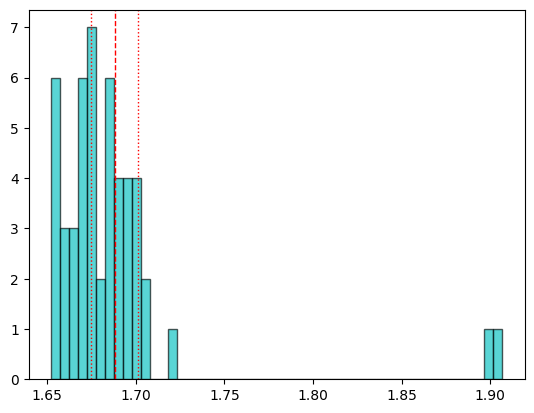

In [69]:
plot_hist(wt_data)

# FFT 16

In [18]:
make(Program.FT16)

rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o libdarknet.so libdarknet.a darknet ./obj/captcha.o ./obj/lsd.o ./obj/super.o ./obj/art.o ./obj/tag.o ./obj/cifar.o ./ob

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT16 -c ./src/l2norm_layer.c -o obj/l2norm_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT16 -c ./src/yolo_layer.c -o obj/yolo_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT16 -c ./src/iseg_layer.c -o obj/iseg_layer.o
g++ -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT16 -c ./src/image_opencv.cpp -o obj/image_opencv.o
ar rcs libdarknet.a obj/gemm.o obj/utils.o obj/cuda.o obj/deconvolutional_layer.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o

/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libnnpack.a when searching for -l:libnnpack.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libpthreadpool.a when searching for -l:libpthreadpool.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libcpuinfo.a when searching for -l:libcpuinfo.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libclog.a when searching for -l:libclog.a


In [19]:
ft16_out = bench(benchmark,n,"ft16") 

./darknet bench_yolo_native 50 ./bench/ft16.txt




layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

NNPACK initialize status: 0
bench_native yolo
 ./bench/ft16.txt


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.557559 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.550301 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.335166 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.244498 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.242129 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.240939 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.244300 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.246018 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.264750 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.257053 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.258467 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.258637 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.267343 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.265642 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.259098 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.257865 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.263639 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.259401 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.259903 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.265054 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.269097 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.269367 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.272128 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.276949 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.272746 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.273766 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.290245 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.281273 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.283481 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.287130 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.284388 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.276977 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.291792 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.289646 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.289301 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.292425 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.284028 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.291395 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.293655 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.287046 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.291390 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.289688 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.298062 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.294867 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.315655 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.307305 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.306531 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.308479 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 4.307323 seconds.
dog: 100%
truck: 92%
bicycle: 99%
PREDICTING ....
data/dog.jpg: Predicted in 4.308403 seconds.
dog: 100%
truck: 92%
bicycle: 99%


In [20]:
ft16_data = readData(ft16_out)

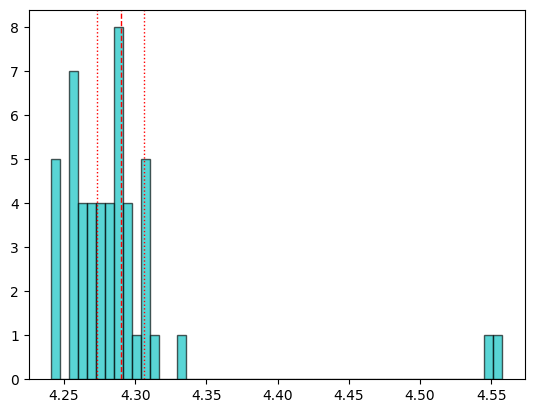

In [21]:
plot_hist(ft16_data)

# FFT 8

In [22]:
make(Program.FT8)

rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o libdarknet.so libdarknet.a darknet ./obj/captcha.o ./obj/lsd.o ./obj/super.o ./obj/art.o ./obj/tag.o ./obj/cifar.o ./ob

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -c ./src/l2norm_layer.c -o obj/l2norm_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -c ./src/yolo_layer.c -o obj/yolo_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -c ./src/iseg_layer.c -o obj/iseg_layer.o
g++ -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -c ./src/image_opencv.cpp -o obj/image_opencv.o
ar rcs libdarknet.a obj/gemm.o obj/utils.o obj/cuda.o obj/deconvolutional_layer.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj

/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libnnpack.a when searching for -l:libnnpack.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libpthreadpool.a when searching for -l:libpthreadpool.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libcpuinfo.a when searching for -l:libcpuinfo.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libclog.a when searching for -l:libclog.a


In [23]:
ft8_out = bench(benchmark,n,"ft8") 

./darknet bench_yolo_native 50 ./bench/ft8.txt




layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

NNPACK initialize status: 0
bench_native yolo
 ./bench/ft8.txt


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.121912 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.121010 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.912350 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.860978 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.856729 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.862470 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.861023 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.858516 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.858246 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.865861 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.858664 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.869071 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.873444 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.871551 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.872039 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.869300 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.870614 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.864444 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.867708 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.870436 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.871770 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.875648 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.879917 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.876259 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.885440 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.885596 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.868716 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.883301 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.890014 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.884435 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.887392 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.883624 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.886029 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.892180 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.887862 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.886084 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.891401 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.892926 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.891955 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.886354 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.898866 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.893833 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.893334 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.897378 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.893375 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.895054 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.898490 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.900351 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.888013 seconds.
dog: 100%
truck: 92%
bicycle: 99%
PREDICTING ....
data/dog.jpg: Predicted in 2.904431 seconds.
dog: 100%
truck: 92%
bicycle: 99%


In [24]:
ft8_data = readData(ft8_out)

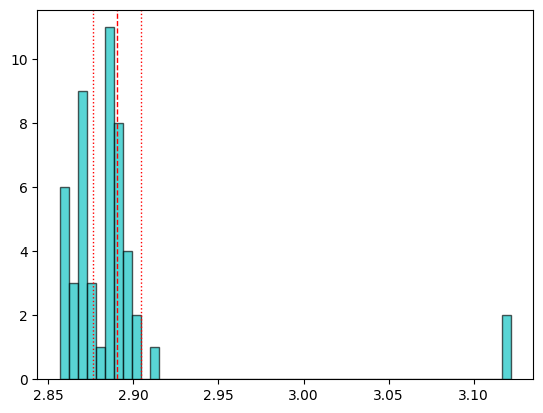

In [25]:
plot_hist(ft8_data)

# Implicit GEMM

In [26]:
make(Program.GEMM)

rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o libdarknet.so libdarknet.a darknet ./obj/captcha.o ./obj/lsd.o ./obj/super.o ./obj/art.o ./obj/tag.o ./obj/cifar.o ./ob

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DGEMM -c ./src/l2norm_layer.c -o obj/l2norm_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DGEMM -c ./src/yolo_layer.c -o obj/yolo_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DGEMM -c ./src/iseg_layer.c -o obj/iseg_layer.o
g++ -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DGEMM -c ./src/image_opencv.cpp -o obj/image_opencv.o
ar rcs libdarknet.a obj/gemm.o obj/utils.o obj/cuda.o obj/deconvolutional_layer.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o

/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libnnpack.a when searching for -l:libnnpack.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libpthreadpool.a when searching for -l:libpthreadpool.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libcpuinfo.a when searching for -l:libcpuinfo.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libclog.a when searching for -l:libclog.a


In [27]:
gemm_out = bench(benchmark,n,"gemm") 

./darknet bench_yolo_native 50 ./bench/gemm.txt




layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

NNPACK initialize status: 0
bench_native yolo
 ./bench/gemm.txt


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.191400 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.174103 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.007808 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.988782 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.995090 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.991613 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.994475 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.995525 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.997540 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.995888 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.999007 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.002048 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.003989 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.997546 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.999923 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.996751 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.001352 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.003263 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.004840 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.002273 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.006017 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.001769 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.003239 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.003400 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.008169 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.004843 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.008289 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.003040 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.007594 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.009718 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.015754 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.011578 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.012856 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.004749 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.008595 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.013536 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.013035 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.014459 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.013017 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.018573 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.019284 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.013225 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.021003 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.022796 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.017878 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.024531 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.026294 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.024258 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.026245 seconds.
dog: 100%
truck: 92%
bicycle: 99%
PREDICTING ....
data/dog.jpg: Predicted in 3.023807 seconds.
dog: 100%
truck: 92%
bicycle: 99%


In [28]:
gemm_data = readData(gemm_out)

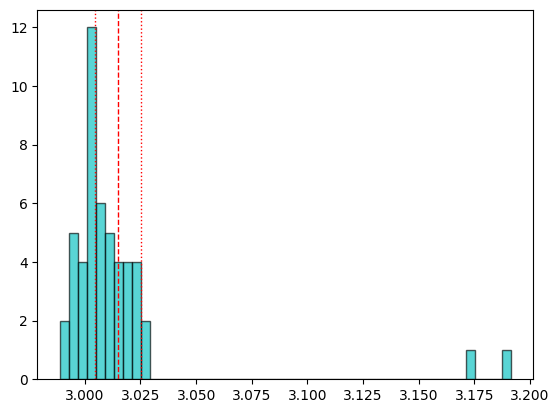

In [29]:
plot_hist(gemm_data)

# Auto

In [30]:
#make(Program.AUTO)

In [31]:
#auto_out = bench(benchmark,n,"auto") 

In [32]:
#auto_data = readData(auto_out)

In [33]:
#plot_hist(auto_data)

# DIRECT

rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o libdarknet.so libdarknet.a darknet ./obj/captcha.o ./obj/lsd.o ./obj/super.o ./obj/art.o ./obj/tag.o ./obj/cifar.o ./ob

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DDIRECT -c ./src/l2norm_layer.c -o obj/l2norm_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DDIRECT -c ./src/yolo_layer.c -o obj/yolo_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DDIRECT -c ./src/iseg_layer.c -o obj/iseg_layer.o
g++ -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DDIRECT -c ./src/image_opencv.cpp -o obj/image_opencv.o
ar rcs libdarknet.a obj/gemm.o obj/utils.o obj/cuda.o obj/deconvolutional_layer.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/

/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libnnpack.a when searching for -l:libnnpack.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libpthreadpool.a when searching for -l:libpthreadpool.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libcpuinfo.a when searching for -l:libcpuinfo.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libclog.a when searching for -l:libclog.a
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64 

NNPACK initialize status: 0
bench_native yolo
 ./bench/bench_yolo_native-direct.txt


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.219769 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.206304 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.202583 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.206007 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.206544 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.203839 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.204139 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.202813 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.198969 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.200251 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.200919 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.202670 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.204565 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.196717 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.202790 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.202919 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.202124 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.204024 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.202036 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.198293 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.199876 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.202108 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.200709 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.202927 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.199828 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.201784 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.203087 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.203347 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.200440 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.204504 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.200221 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.201123 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.200928 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.200368 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.198097 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.195096 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.204012 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.203366 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.202152 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.201867 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.200473 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.207192 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.203157 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.204434 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.199218 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.198666 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.201856 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.200360 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 3.200405 seconds.
dog: 100%
truck: 92%
bicycle: 99%
PREDICTING ....
data/dog.jpg: Predicted in 3.194760 seconds.
dog: 100%
truck: 92%
bicycle: 99%
mean:  3.20209272


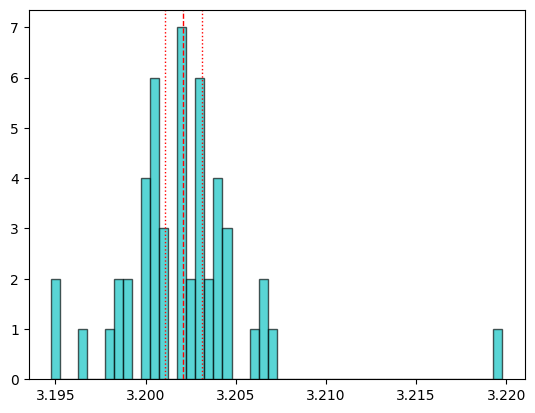

In [84]:
direct_data = runBench(Program.DIRECT, benchmark, 'direct',n) 

rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o libdarknet.so libdarknet.a darknet ./obj/captcha.o ./obj/lsd.o ./obj/super.o ./obj/art.o ./obj/tag.o ./obj/cifar.o ./ob

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -DDIRECT -c ./src/reorg_layer.c -o obj/reorg_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -DDIRECT -c ./src/tree.c -o obj/tree.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -DDIRECT -c ./src/lstm_layer.c -o obj/lstm_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -DDIRECT -c ./src/l2norm_layer.c -o obj/l2norm_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -DDIRECT -c ./src/yolo_layer.c -o obj/yolo_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -st

/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libnnpack.a when searching for -l:libnnpack.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libpthreadpool.a when searching for -l:libpthreadpool.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libcpuinfo.a when searching for -l:libcpuinfo.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libclog.a when searching for -l:libclog.a
layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64 

NNPACK initialize status: 0
bench_native yolo
 ./bench/bench_yolo_native-direct-ft8.txt


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.658821 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.652244 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.650666 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.643033 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.646868 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.644419 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.644305 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.641885 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.642906 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.643287 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.641025 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.643188 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.641359 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.640766 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.642037 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.640548 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.636236 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.639637 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.643957 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.642052 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.644373 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.650618 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.649455 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.642510 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.644971 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.650430 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.643124 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.645349 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.641054 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.640180 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.641407 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.645062 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.647209 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.637020 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.639226 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.641608 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.641373 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.642642 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.635958 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.647430 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.649613 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.647522 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.641006 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.639102 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.640692 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.646806 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.644158 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.644783 seconds.
dog: 100%
truck: 92%
bicycle: 99%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

PREDICTING ....
data/dog.jpg: Predicted in 2.640012 seconds.
dog: 100%
truck: 92%
bicycle: 99%
PREDICTING ....
data/dog.jpg: Predicted in 2.639890 seconds.
dog: 100%
truck: 92%
bicycle: 99%
mean:  2.6436764400000006


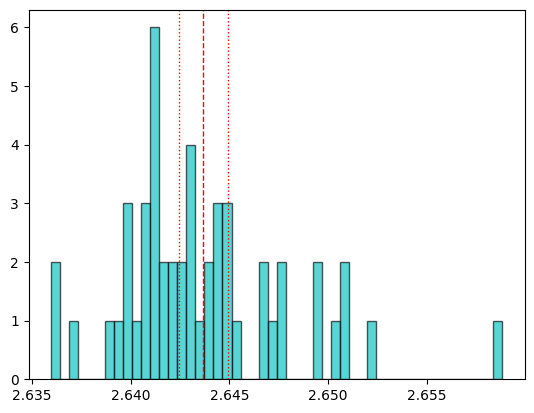

In [86]:
direct_ft8_data = runBench(Program.DIRECT_FT8, benchmark, 'direct-ft8',n) 

# FFT16 vs FFT8

ft16  mean: 4.289646
ft8  mean: 2.8903278799999996
speedup: 1.4841381940376954


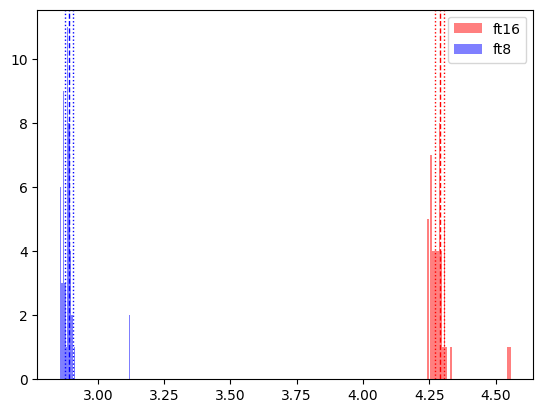

In [42]:
plot_comp(ft16_data,"ft16",ft8_data,"ft8")

# FFT8 vs baseline

In [43]:
#plot_comp(ft8_data,baseline_data)

# FFT8 vs wt

ft8  mean: 2.8903278799999996
wt  mean: 1.68805636
speedup: 1.7122223810110224


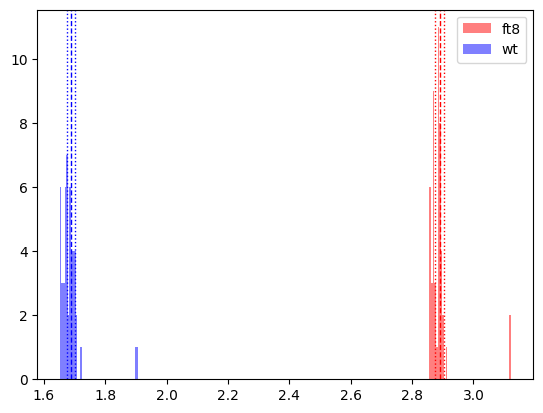

In [70]:
plot_comp(ft8_data,"ft8",wt_data,"wt")

# FFT8 vs GEMM

ft8  mean: 2.8903278799999996
gemm  mean: 3.01489534
speedup: 1.043098037721589


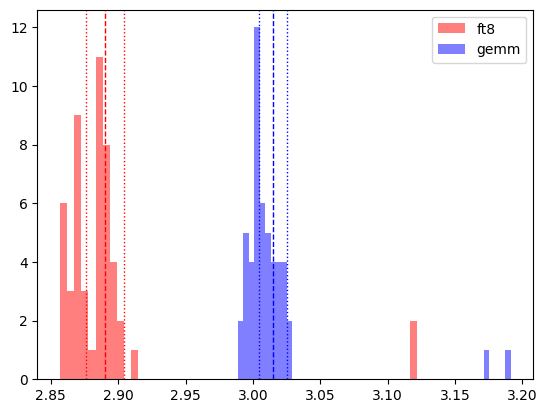

In [46]:
plot_comp(ft8_data,"ft8",gemm_data,"gemm")

# FFT16 vs GEMM

ft16  mean: 4.289646
gemm  mean: 3.01489534
speedup: 1.4228175496135134


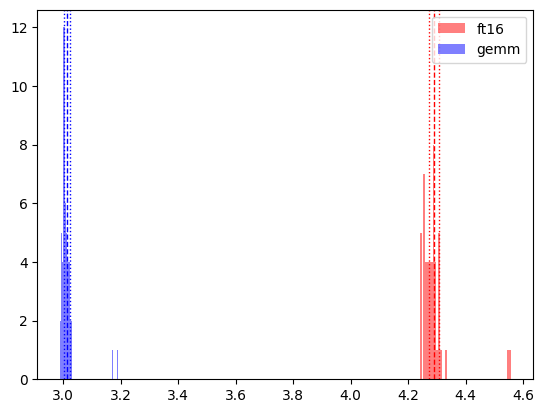

In [47]:
plot_comp(ft16_data,"ft16",gemm_data,"gemm")

# Direct vs GEMM

direct  mean: 3.20209272
gemm  mean: 3.01489534
speedup: 1.0620908386159766


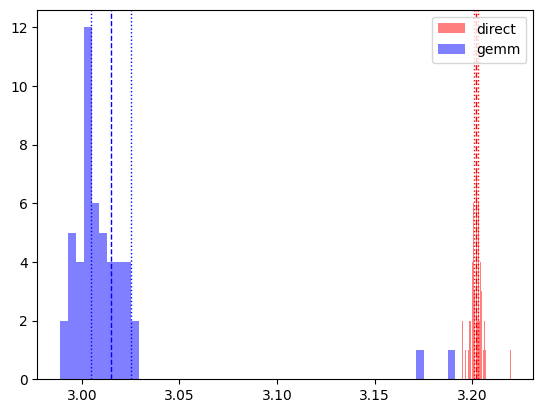

In [85]:
plot_comp(direct_data,"direct",gemm_data,"gemm")

## Direct FFT8 vs FFT8

direct-ft8  mean: 2.6436764400000006
ft8  mean: 2.8903278799999996
speedup: 1.0932986489072767


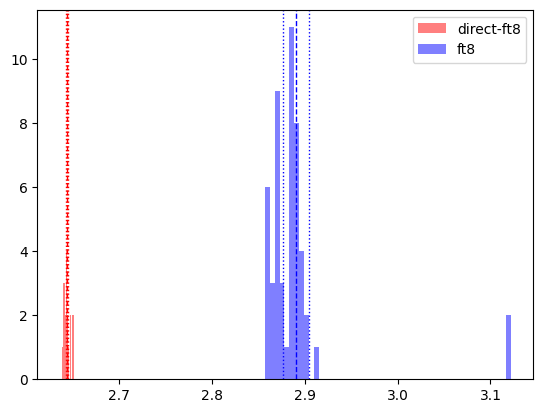

In [87]:
plot_comp(direct_ft8_data,"direct-ft8",ft8_data,"ft8")

# VGG

## FT8

rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o libdarknet.so libdarknet.a darknet ./obj/captcha.o ./obj/lsd.o ./obj/super.o ./obj/art.o ./obj/tag.o ./obj/cifar.o ./ob

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -c ./src/l2norm_layer.c -o obj/l2norm_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -c ./src/yolo_layer.c -o obj/yolo_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -c ./src/iseg_layer.c -o obj/iseg_layer.o
g++ -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT8 -c ./src/image_opencv.cpp -o obj/image_opencv.o
ar rcs libdarknet.a obj/gemm.o obj/utils.o obj/cuda.o obj/deconvolutional_layer.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj

/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libnnpack.a when searching for -l:libnnpack.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libpthreadpool.a when searching for -l:libpthreadpool.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libcpuinfo.a when searching for -l:libcpuinfo.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libclog.a when searching for -l:libclog.a
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 12

NNPACK initialize status: 0
bench_native vgg
 ./bench/bench_vgg_native-ft8.txt


Done!
data/eagle.jpg: Predicted in 0.460832 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.460943 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.370181 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.359005 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.355621 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.354591 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.358279 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.362138 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.362221 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.357807 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.356117 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.357610 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.358069 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.358153 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.359675 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.359998 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.363775 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.362822 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.364689 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.362802 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.362421 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.356593 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.353014 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352605 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352355 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352430 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352314 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352411 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352420 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352337 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352211 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352365 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352337 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.351960 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352336 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352393 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352930 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.351687 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.351569 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.356470 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.354526 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.353860 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.353896 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.356882 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.353173 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.354601 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.353328 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352898 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.352843 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.353479 seconds.


92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone
mean:  0.3601994399999999


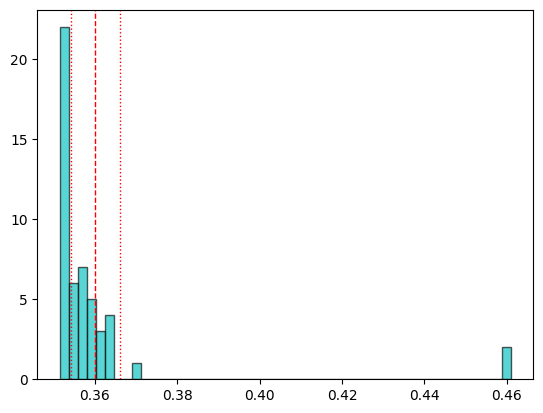

In [57]:
ft8_vgg_data = runBench(Program.FT8, vgg, 'ft8',n)

## FT16

rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o libdarknet.so libdarknet.a darknet ./obj/captcha.o ./obj/lsd.o ./obj/super.o ./obj/art.o ./obj/tag.o ./obj/cifar.o ./ob

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT16 -c ./src/l2norm_layer.c -o obj/l2norm_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT16 -c ./src/yolo_layer.c -o obj/yolo_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT16 -c ./src/iseg_layer.c -o obj/iseg_layer.o
g++ -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DFT16 -c ./src/image_opencv.cpp -o obj/image_opencv.o
ar rcs libdarknet.a obj/gemm.o obj/utils.o obj/cuda.o obj/deconvolutional_layer.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o

/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libnnpack.a when searching for -l:libnnpack.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libpthreadpool.a when searching for -l:libpthreadpool.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libcpuinfo.a when searching for -l:libcpuinfo.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libclog.a when searching for -l:libclog.a
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 12

NNPACK initialize status: 0
bench_native vgg
 ./bench/bench_vgg_native-ft16.txt


Done!
data/eagle.jpg: Predicted in 0.589705 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.585566 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.501946 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.479087 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.467853 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474461 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.473920 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474930 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.475636 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.475904 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474399 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474479 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474660 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.475136 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474655 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474871 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474592 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.475158 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.460748 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474746 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.475627 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474720 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474364 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474189 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.475018 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.460526 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474820 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474622 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.473998 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474294 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474562 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.476154 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474580 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474830 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474337 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474933 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.475040 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474487 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474561 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474228 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474230 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474338 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.475153 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474954 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474572 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474747 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474155 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474646 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474524 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.474350 seconds.


92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone
mean:  0.47916022


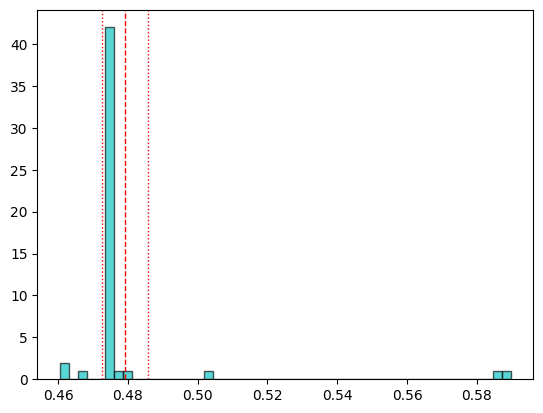

In [58]:
ft16_vgg_data = runBench(Program.FT16, vgg, 'ft16',n)

## WT

rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o libdarknet.so libdarknet.a darknet ./obj/captcha.o ./obj/lsd.o ./obj/super.o ./obj/art.o ./obj/tag.o ./obj/cifar.o ./ob

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DWT -c ./src/l2norm_layer.c -o obj/l2norm_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DWT -c ./src/yolo_layer.c -o obj/yolo_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DWT -c ./src/iseg_layer.c -o obj/iseg_layer.o
g++ -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DWT -c ./src/image_opencv.cpp -o obj/image_opencv.o
ar rcs libdarknet.a obj/gemm.o obj/utils.o obj/cuda.o obj/deconvolutional_layer.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o obj/net

/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libnnpack.a when searching for -l:libnnpack.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libpthreadpool.a when searching for -l:libpthreadpool.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libcpuinfo.a when searching for -l:libcpuinfo.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libclog.a when searching for -l:libclog.a
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 12

NNPACK initialize status: 0
bench_native vgg
 ./bench/bench_vgg_native-wt.txt


Done!
data/eagle.jpg: Predicted in 0.367132 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.364258 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.269842 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.261533 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.262036 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.250514 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.250502 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.250499 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251120 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.250703 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.250827 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251021 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251199 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.250361 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.256122 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.255604 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.261475 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.261477 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.266982 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.266721 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.267899 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.267354 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.267111 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.265152 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.250552 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251123 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.256306 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.256529 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.256287 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251730 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251186 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251311 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251187 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251224 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251023 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251230 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251036 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251639 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251548 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251015 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.250963 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251606 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.256623 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.257242 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.256788 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.259038 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251061 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251692 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.251158 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!


92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone
mean:  0.2597911


data/eagle.jpg: Predicted in 0.251014 seconds.


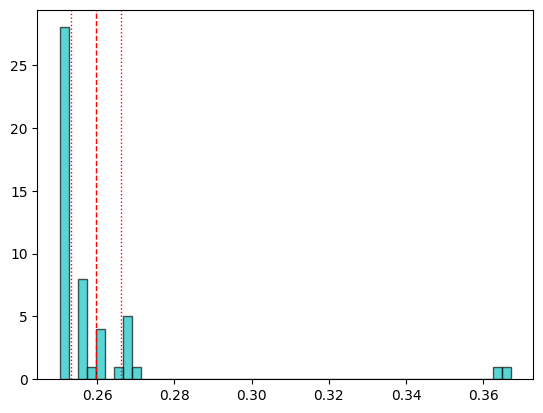

In [71]:
wt_vgg_data = runBench(Program.WT, vgg, 'wt',n)

## GEMM

rm -rf ./obj/gemm.o ./obj/utils.o ./obj/cuda.o ./obj/deconvolutional_layer.o ./obj/convolutional_layer.o ./obj/list.o ./obj/image.o ./obj/activations.o ./obj/im2col.o ./obj/col2im.o ./obj/blas.o ./obj/crop_layer.o ./obj/dropout_layer.o ./obj/maxpool_layer.o ./obj/softmax_layer.o ./obj/data.o ./obj/matrix.o ./obj/network.o ./obj/connected_layer.o ./obj/cost_layer.o ./obj/parser.o ./obj/option_list.o ./obj/detection_layer.o ./obj/route_layer.o ./obj/upsample_layer.o ./obj/box.o ./obj/normalization_layer.o ./obj/avgpool_layer.o ./obj/layer.o ./obj/local_layer.o ./obj/shortcut_layer.o ./obj/logistic_layer.o ./obj/activation_layer.o ./obj/rnn_layer.o ./obj/gru_layer.o ./obj/crnn_layer.o ./obj/demo.o ./obj/batchnorm_layer.o ./obj/region_layer.o ./obj/reorg_layer.o ./obj/tree.o ./obj/lstm_layer.o ./obj/l2norm_layer.o ./obj/yolo_layer.o ./obj/iseg_layer.o ./obj/image_opencv.o libdarknet.so libdarknet.a darknet ./obj/captcha.o ./obj/lsd.o ./obj/super.o ./obj/art.o ./obj/tag.o ./obj/cifar.o ./ob

gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DGEMM -c ./src/l2norm_layer.c -o obj/l2norm_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DGEMM -c ./src/yolo_layer.c -o obj/yolo_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DGEMM -c ./src/iseg_layer.c -o obj/iseg_layer.o
g++ -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -static -Ofast -fno-tree-vectorize -DNNPACK -DGEMM -c ./src/image_opencv.cpp -o obj/image_opencv.o
ar rcs libdarknet.a obj/gemm.o obj/utils.o obj/cuda.o obj/deconvolutional_layer.o obj/convolutional_layer.o obj/list.o obj/image.o obj/activations.o obj/im2col.o obj/col2im.o obj/blas.o obj/crop_layer.o obj/dropout_layer.o obj/maxpool_layer.o obj/softmax_layer.o obj/data.o obj/matrix.o

/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libnnpack.a when searching for -l:libnnpack.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libpthreadpool.a when searching for -l:libpthreadpool.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libcpuinfo.a when searching for -l:libcpuinfo.a
/usr/bin/ld: skipping incompatible /home/fft_vec/arm-deps/usr/local/lib/libclog.a when searching for -l:libclog.a
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 12

NNPACK initialize status: 0
bench_native vgg
 ./bench/bench_vgg_native-gemm.txt


Done!
data/eagle.jpg: Predicted in 0.669166 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.665757 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.627388 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.624377 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623822 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623853 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.624400 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622777 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.624652 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623862 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623598 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.625048 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623179 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623428 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622849 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622620 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.625047 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622117 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622370 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622925 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622564 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.625421 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623599 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622981 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622059 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622484 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623984 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622994 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623790 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622798 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622633 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.624269 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622342 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623736 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.631896 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.633055 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.631635 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.630196 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.624121 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623055 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.625025 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623938 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622878 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.624480 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.622919 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.625389 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623073 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.621873 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!
data/eagle.jpg: Predicted in 0.623851 seconds.
policy: Using default 'constant'
max_batches: Using default '0'
layer     filters    size              input                output
    0 Crop Layer: 256 x 256 -> 224 x 224 x 3 image
shift: Using default '0.000000'
    1 conv     64  3 x 3 / 1   224 x 224 x   3   ->   224 x 224 x  64  0.173 BFLOPs
    2 conv     64  3 x 3 / 1   224 x 224 x  64   ->   224 x 224 x  64  3.699 BFLOPs
    3 max          2 x 2 / 2   224 x 224 x  64   ->   112 x 112 x  64
    4 conv    128  3 x 3 / 1   112 x 112 x  64   ->   112 x 112 x 128  1.850 BFLOPs
    5 conv    128  3 x 3 / 1   112 x 112 x 128   ->   112 x 112 x 128  3.699 BFLOPs
    6 max          2 x 2 / 2   112 x 112 x 128   ->    56 x  56 x 128
    7 conv    256  3 x 3 / 1    56 x  56 x 128   ->    56 x  56 x 256  1.850 BFLOPs
    8 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
    9 conv    256  3 x 3 / 1    56 x  56 x 256   ->    56 x  56 x 256  3.699 BFLOPs
   10

92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone


Done!


92.12%: bald eagle
 7.60%: kite
 0.27%: vulture
 0.00%: albatross
 0.00%: ruddy turnstone
mean:  0.6259858199999999


data/eagle.jpg: Predicted in 0.623018 seconds.


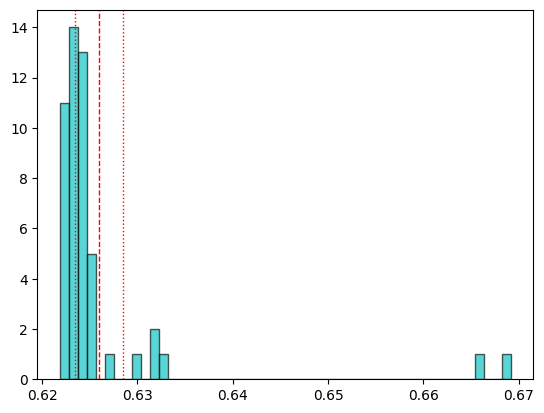

In [60]:
gemm_vgg_data = runBench(Program.GEMM, vgg, 'gemm',n)

# FFT16 vs FFT8

ft16  mean: 0.47916022
ft8  mean: 0.3601994399999999
speedup: 1.3302636450517529


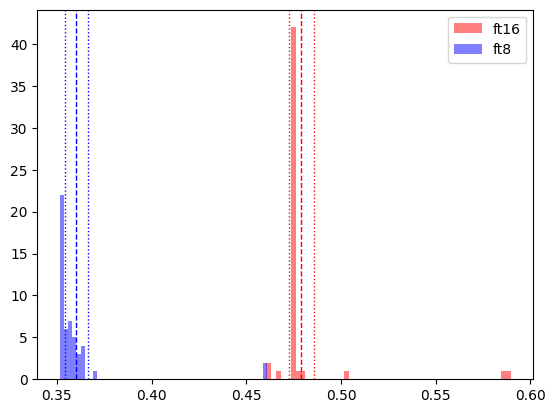

In [61]:
plot_comp(ft16_vgg_data,"ft16",ft8_vgg_data,"ft8")

# FFT8 vs wt

ft8  mean: 0.3601994399999999
wt  mean: 0.2597911
speedup: 1.3864964581157704


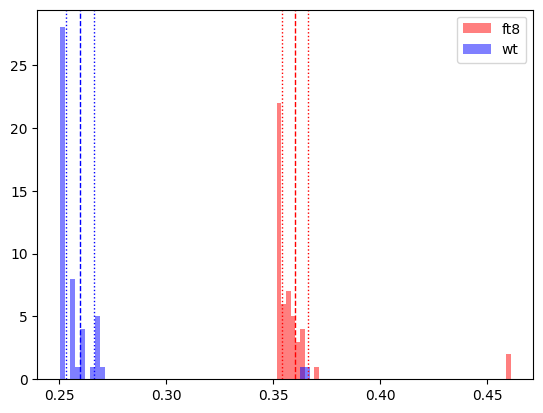

In [72]:
plot_comp(ft8_vgg_data,"ft8",wt_vgg_data,"wt")

# FFT8 vs GEMM

ft8  mean: 0.3601994399999999
gemm  mean: 0.6259858199999999
speedup: 1.7378867107622378


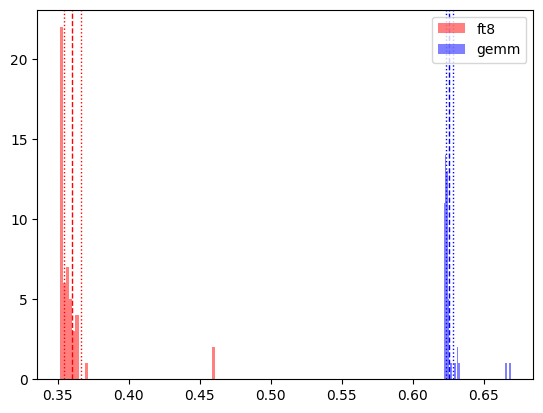

In [63]:
plot_comp(ft8_vgg_data,"ft8",gemm_vgg_data,"gemm")

# FFT16 vs GEMM

ft16  mean: 0.47916022
gemm  mean: 0.6259858199999999
speedup: 1.3064227660635097


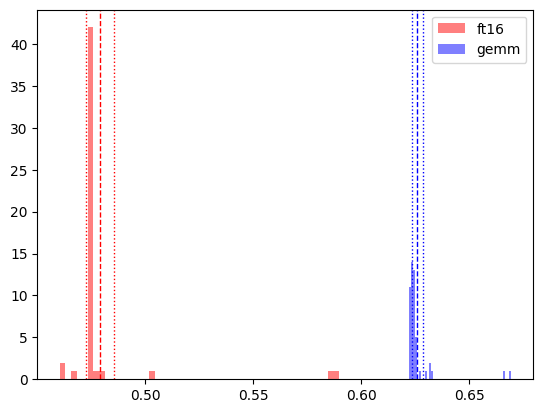

In [64]:
plot_comp(ft16_vgg_data,"ft16",gemm_vgg_data,"gemm")

In [ ]:
# 